### Confusion matrix and Decision Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

In [2]:
data=pd.read_csv('hrdata_features.csv')
data.head()

,Candidate.relocate.actual_Yes,Notice.period,Candidate.Source_Employee Referral,Location_Chennai,Location_Bangalore,Location_Hyderabad,Location_Noida,Location_Kolkata,Location_Gurgaon,Location_Mumbai,...,Offered.band_E3,Offered.band_E2,DOJ.Extended_Yes,Age,LOB_ETS,LOB_MMS,LOB_BFSI,Location_Cochin,Location_Others,Status_Not Joined
0,0,30,0,0,0,0,1,0,0,0,...,0,1,1,34,0,0,0,0,0,0
1,0,30,1,1,0,0,0,0,0,0,...,0,1,0,34,0,0,0,0,0,0
2,0,45,0,0,0,0,1,0,0,0,...,0,1,0,27,0,0,0,0,0,0
3,0,30,1,0,0,0,1,0,0,0,...,0,1,0,34,0,0,0,0,0,0
4,1,120,1,0,0,0,1,0,0,0,...,0,1,1,34,0,0,0,0,0,0


In [3]:
print(data.shape)
print(data['Status_Not Joined'].value_counts()/len(data))

(8995, 24)
0    0.813007
1    0.186993
Name: Status_Not Joined, dtype: float64


**1.Up-Sampling**

In [4]:
# splitting into sample=0,sample=1
data_joined=data[data['Status_Not Joined']==0]  #negative case
data_notjoined=data[data['Status_Not Joined']==1] #poistive case

In [5]:
from sklearn.utils import resample

In [6]:
data_joined_resample=resample(data_joined,replace=True,n_samples=2000)

In [7]:
data_joined_resample.shape

(2000, 24)

In [8]:
# concatenate data_no and data_yes_resample
data_resample=pd.concat((data_notjoined,data_joined_resample),axis=0)

In [9]:
data_resample['Status_Not Joined'].value_counts()

0    2000
1    1682
Name: Status_Not Joined, dtype: int64

In [10]:
data_resample.to_csv('data_resample1.csv',index=False)

In [11]:
data_resample.head(2)

,Candidate.relocate.actual_Yes,Notice.period,Candidate.Source_Employee Referral,Location_Chennai,Location_Bangalore,Location_Hyderabad,Location_Noida,Location_Kolkata,Location_Gurgaon,Location_Mumbai,...,Offered.band_E3,Offered.band_E2,DOJ.Extended_Yes,Age,LOB_ETS,LOB_MMS,LOB_BFSI,Location_Cochin,Location_Others,Status_Not Joined
10,0,30,1,0,0,0,1,0,0,0,...,0,1,0,34,0,0,0,0,0,1
12,0,30,0,0,0,0,1,0,0,0,...,0,1,1,29,0,0,0,0,0,1


**Independent and Dependent variables**

In [12]:
x=data_resample.iloc[:,:-1]
y=data_resample.iloc[:,-1]

In [13]:
# splitting data into training and testing
np.random.seed(1001)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2577, 23), (1105, 23), (2577,), (1105,))

**Building Machine learning model**

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model=LogisticRegression()

In [17]:
model.fit(x_train,y_train)      #training

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

**Maximum likehood estimation**

In [18]:
y_pred_train=model.predict_proba(x_train)

In [19]:
y_pred_train_1=y_pred_train[:,1]

In [20]:
from sklearn.metrics import log_loss
class threshold():
    def __init__(self):
        self.th=0.5
    def predict_threshold(self,y):
        if y>=self.th:
            return 1
        else:
            return 0

In [21]:
y_pred_train_prob_1=y_pred_train_1
probabilites=np.linspace(0,1,num=100)
pre=threshold()
mle=[]
for p in probabilites:
    pre.th=p
    yy=pd.Series(y_pred_train_prob_1)
    y_pred_0_5=yy.apply(pre.predict_threshold)
    loss=log_loss(y_train,y_pred_0_5)
    mle.append(loss)

Threshold probability value= 0.5050505050505051


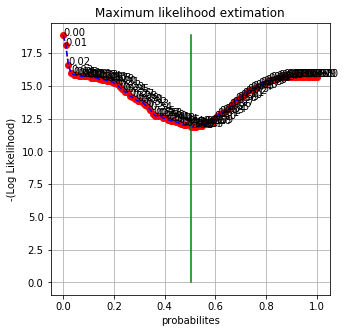

In [22]:
#visualize
plt.figure(figsize=(5,5))
plt.plot(probabilites,mle,'ro--')
plt.plot(probabilites,mle,'b--')
ind=np.array(mle).argmin()
mx=max(mle)
val=probabilites[ind]
print("Threshold probability value=",val)
plt.plot([val,val],[0,mx],'g')
for i,p in enumerate(probabilites):
    plt.text(probabilites[i],mle[i],'%0.2f'%(p))
plt.xlabel('probabilites')
plt.ylabel('-(Log Likelihood)')
plt.title('Maximum likelihood extimation')
plt.grid()
plt.show()

**Apply to test data**

In [23]:
y_pred_prob_test=model.predict_proba(x_test)
y_pred_prob_test_1=y_pred_prob_test[:,1]    

In [24]:
pre=threshold()#predictor class 
thre_prob=0.51 #from mle
pre.th=thre_prob #setting threshold
yy=pd.Series(y_pred_prob_test_1) #converting prob array into series
y_pred_class_test=yy.apply(pre.predict_threshold) # apply predictor class

**Statstical evaluation**

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

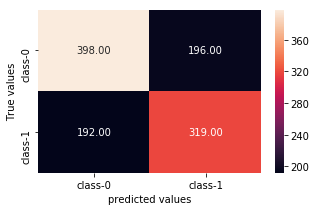

In [26]:
cm=confusion_matrix(y_test,y_pred_class_test)
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True,fmt='0.2f',xticklabels=['class-0','class-1'],yticklabels=['class-0','class-1'],cbar=True)
plt.xlabel('predicted values')
plt.ylabel('True values')
plt.show()

**ROC and AUC(Training data)**

In [27]:
from sklearn.metrics import roc_curve,auc

In [28]:
y_pred_train_prob=model.predict_proba(x_train)
y_pred_train_prob1=y_pred_train[:,1]

In [29]:
fpr,tpr,proba=roc_curve(y_train,y_pred_train_prob1)

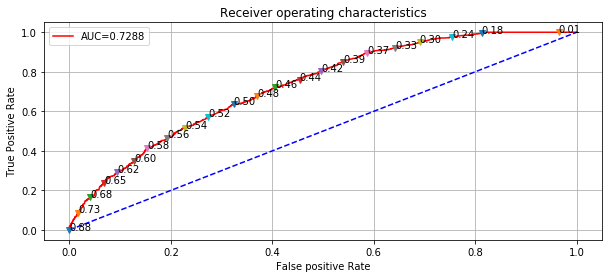

In [30]:
plt.figure(figsize=(10,4))
plt.plot(fpr,tpr,'r-')
plt.plot([0,1],[0,1],'b--')
for i in range(len(proba)):
    if i % 50==1:  #display for every 5th value
        plt.plot(fpr[i],tpr[i],'v')
        plt.text(fpr[i],tpr[i],'%0.2f'%proba[i])
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
area=auc(fpr,tpr)
plt.legend(['AUC=%0.4f'%area])
plt.grid()        

In [31]:
pre=threshold()#predictor class 
thre_prob=0.3
pre.th=thre_prob #setting threshold
yy=pd.Series(y_pred_train_prob1) #converting prob array into series
y_pred_class_train=yy.apply(pre.predict_threshold) # apply predictor class

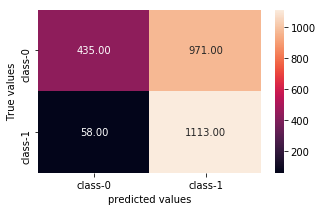

In [32]:
cm=confusion_matrix(y_train,y_pred_class_train)
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True,fmt='0.2f',xticklabels=['class-0','class-1'],yticklabels=['class-0','class-1'],cbar=True)
plt.xlabel('predicted values')
plt.ylabel('True values')
plt.show()

In [33]:
cr=classification_report(y_train,y_pred_class_train)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.31      0.46      1406
           1       0.53      0.95      0.68      1171

   micro avg       0.60      0.60      0.60      2577
   macro avg       0.71      0.63      0.57      2577
weighted avg       0.72      0.60      0.56      2577



**Decision Tree**

In [34]:
from sklearn.tree import DecisionTreeClassifier #classification tree
from sklearn.tree import export_graphviz #visualizating tree

In [35]:
model=DecisionTreeClassifier(criterion='gini',max_depth=5)

In [36]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
from sklearn.metrics import cohen_kappa_score,roc_auc_score

In [38]:
y_pred=model.predict(x_test)

In [39]:
kappa_score=cohen_kappa_score(y_test,y_pred)
print('kappa score=',kappa_score)
print('-'*20)
auc_score=roc_auc_score(y_test,y_pred)
print('AUC score=',auc_score)
print('-'*20)
cm=confusion_matrix(y_test,y_pred)
print(cm)

kappa score= 0.30567322151245013
--------------------
AUC score= 0.6518544874709259
--------------------
[[428 166]
 [213 298]]


**ROC Curve**

In [40]:
y_prob_pred=model.predict_proba(x_test)
y_prob=y_prob_pred[:,1]

In [41]:
y_test[y_test==3]=0
y_pred[y_pred==3]=0

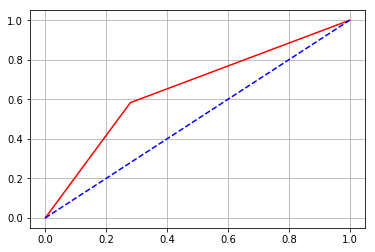

In [42]:
fpr,tpr,thre=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,'r')
plt.plot([0,1],[0,1],'b--')
plt.grid()
plt.show()

In [43]:
import pydotplus 

In [44]:
export_graphviz(model,out_file='hrdata.odt',feature_names=x_train.columns,filled=True)

In [45]:
graph=pydotplus.graph_from_dot_file('hrdata.odt')

In [46]:
graph.write_pdf('hrdata_tree.pdf')

True

In [47]:
graph.write_jpg('hrdata_tree.jpg')

True

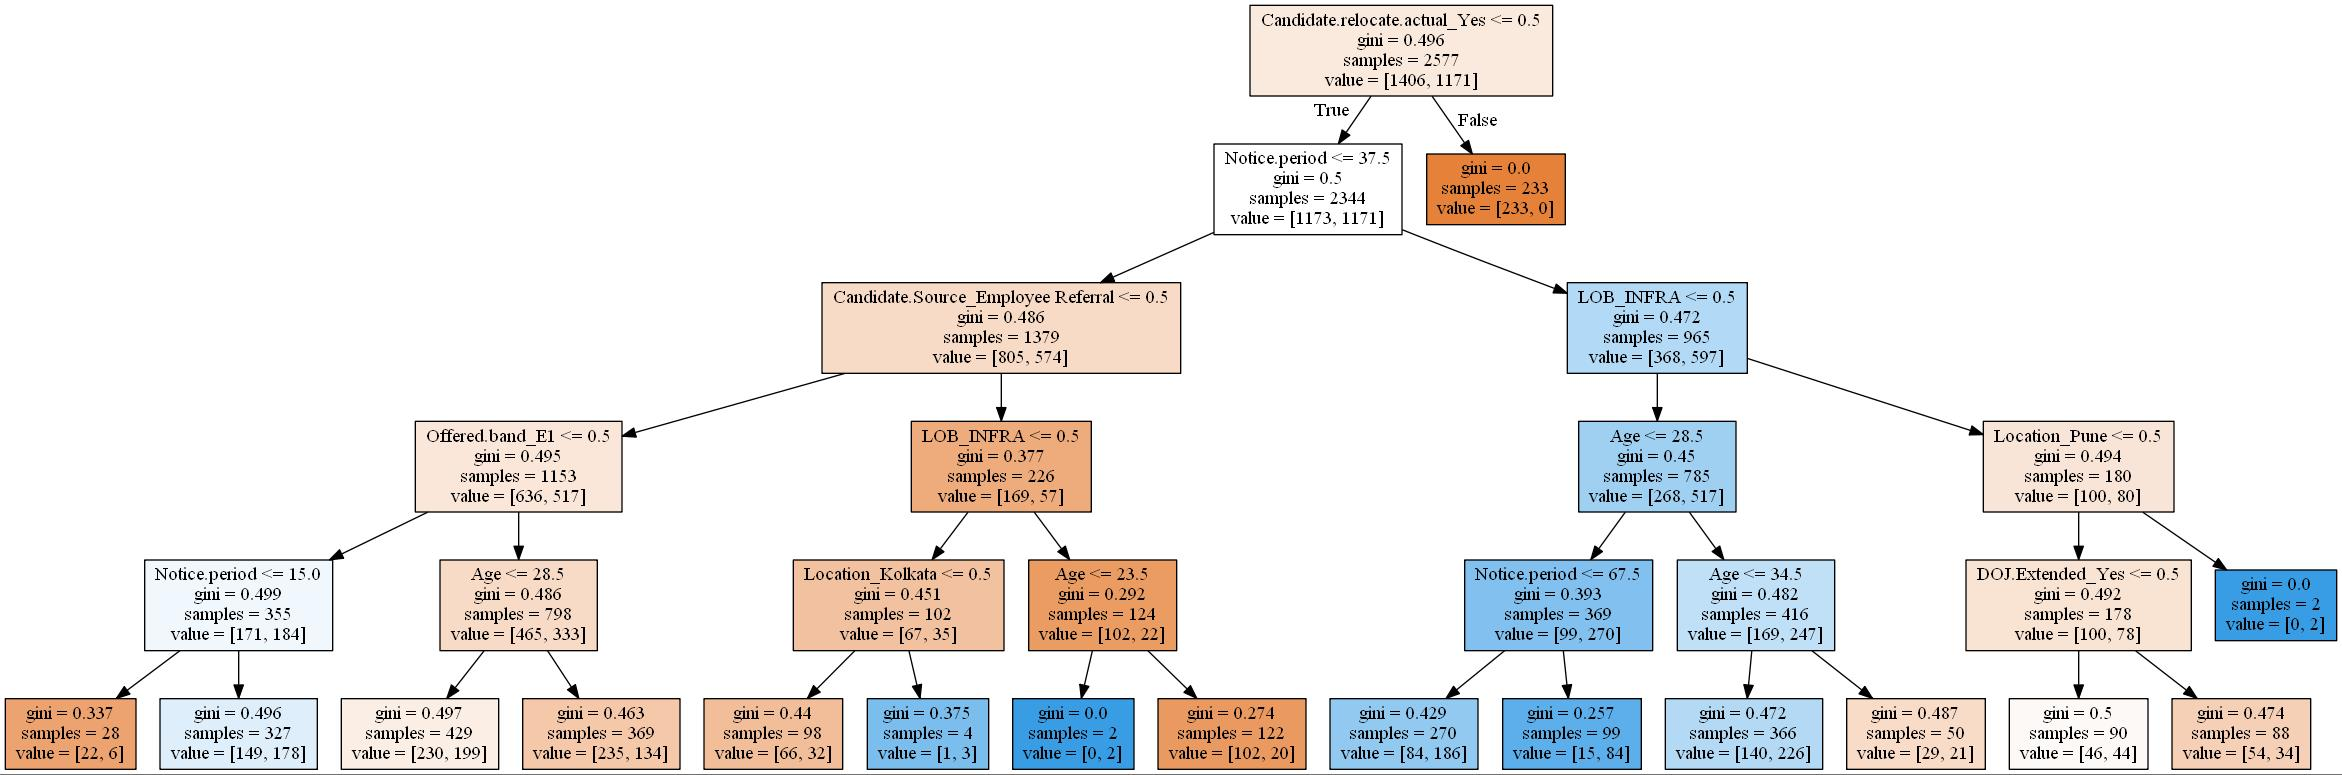

In [48]:
from IPython.display import Image
Image('hrdata_tree.jpg')

**Grid-search CV**

In [49]:
from sklearn.model_selection import GridSearchCV #grid search crossvalidation
#hyperparameter tuning

In [50]:
model_tune=DecisionTreeClassifier()

In [51]:
tuned_parameter=[{'criterion':['gini','entropy'],'max_depth':range(2,10)}]

In [52]:
clf=GridSearchCV(model_tune,param_grid=tuned_parameter,cv=10,scoring='roc_auc')

In [53]:
clf.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'criterion': ['gini', 'entropy'], 'max_depth': range(2, 10)}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [54]:
clf.best_score_

0.7006969153382346

In [55]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 6}